## Importing Data and Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


from pandas import DataFrame, Series
from scipy import stats

sns.set_style(style='darkgrid')
%matplotlib inline

## Importing libraries.
## Setting seaborn theme.

In [2]:
spec_cols = [9,10,11,12,15,16,18]

## Specify desired columns.

ufc_fights = pd.read_excel('ufc_fights.xlsx',usecols = spec_cols).dropna(axis = 'index',how = 'any')

## Reading spreadsheet containing list of all fights.

ufc_fights = ufc_fights[ufc_fights.method != 'Draw']
ufc_fights = ufc_fights[ufc_fights.f1result != 'NC']

## Removing rows for fights ending in draw/no contest.

ufc_fights

,f1name,f2name,f1result,f2result,method,method_d,round
0,Royce Gracie,Gerard Gordeau,win,loss,Submission,Rear-Naked Choke,1
1,Jason DeLucia,Trent Jenkins,win,loss,Submission,Rear-Naked Choke,1
2,Royce Gracie,Ken Shamrock,win,loss,Submission,Rear-Naked Choke,1
3,Gerard Gordeau,Kevin Rosier,win,loss,TKO,Corner Stoppage,1
4,Ken Shamrock,Patrick Smith,win,loss,Submission,Heel Hook,1
...,...,...,...,...,...,...,...
3564,Anthony Smith,Leonardo Guimaraes,win,loss,Decision,Unanimous,3
3565,Nathan Coy,Jonavin Webb,win,loss,Decision,Unanimous,3
3566,Ashlee Evans-Smith,Marion Reneau,win,loss,Decision,Split,3
3567,Lauren Murphy,Kelly Faszholz,win,loss,TKO,Elbows and Punches,3


In [3]:
 spec_cols2 = [2,5]

ufc_fighters = pd.read_excel('ufc_fighters.xlsx',usecols = spec_cols2).dropna()

## Importing list of all fighters' stats.

ufc_fighters

,name,height
0,Conor McGregor,68.0
1,Jon Jones,76.0
2,Holly Holm,68.0
3,Dominick Cruz,68.0
4,Demetrious Johnson,63.0
...,...,...
1521,Thaddeus Luster,75.0
1522,Frank Hamaker,74.0
1523,Ryan Parker,75.0
1524,Marcus Davis,68.0


## Merging Data

In [4]:
merged_fights = pd.merge(ufc_fights,ufc_fighters,left_on = 'f1name',right_on = 'name',how = 'left').drop('name',axis = 1).rename(columns = {'height':'height_win'})

## Merging on name for the winners, naming column height_win.

merged_fights = pd.merge(merged_fights,ufc_fighters,left_on = 'f2name',right_on = 'name',how = 'left').drop('name',axis = 1).rename(columns = {'height':'height_loss'}).dropna(axis = 0)

## Same merge on name column but for losers, naming column height_loss.
## Keeping original index by using (how = 'left') parameter.
## Drop null.

merged_fights.to_excel("ufc_fights_merged.xlsx")

## Saving merged DataFrame as .xlsx.

display(merged_fights,merged_fights.describe())

,f1name,f2name,f1result,f2result,method,method_d,round,height_win,height_loss
0,Royce Gracie,Gerard Gordeau,win,loss,Submission,Rear-Naked Choke,1,72.0,77.0
1,Jason DeLucia,Trent Jenkins,win,loss,Submission,Rear-Naked Choke,1,71.0,74.0
2,Royce Gracie,Ken Shamrock,win,loss,Submission,Rear-Naked Choke,1,72.0,73.0
3,Gerard Gordeau,Kevin Rosier,win,loss,TKO,Corner Stoppage,1,77.0,76.0
4,Ken Shamrock,Patrick Smith,win,loss,Submission,Heel Hook,1,73.0,74.0
...,...,...,...,...,...,...,...,...,...
3498,Anthony Smith,Leonardo Guimaraes,win,loss,Decision,Unanimous,3,76.0,72.0
3499,Nathan Coy,Jonavin Webb,win,loss,Decision,Unanimous,3,70.0,69.0
3500,Ashlee Evans-Smith,Marion Reneau,win,loss,Decision,Split,3,68.0,66.0
3501,Lauren Murphy,Kelly Faszholz,win,loss,TKO,Elbows and Punches,3,68.0,68.0


,round,height_win,height_loss
count,3433.000000,3433.000000,3433.000000
mean,2.224876,70.859598,70.781532
std,1.011933,3.241823,3.167348
min,1.000000,61.000000,61.000000
25%,1.000000,69.000000,69.000000
50%,3.000000,71.000000,71.000000
75%,3.000000,73.000000,73.000000
max,5.000000,84.000000,84.000000


(array([ 19.,  34.,  45.,  65., 183., 182., 613., 391., 356., 428., 407.,
        323., 198., 137.,  14.,  11.,  14.,   0.,   2.,  11.]),
 array([61.  , 62.15, 63.3 , 64.45, 65.6 , 66.75, 67.9 , 69.05, 70.2 ,
        71.35, 72.5 , 73.65, 74.8 , 75.95, 77.1 , 78.25, 79.4 , 80.55,
        81.7 , 82.85, 84.  ]),
 <BarContainer object of 20 artists>)

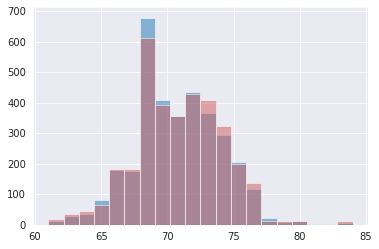

In [5]:
height_loss = merged_fights['height_loss']
height_win = merged_fights['height_win']


plt.hist(height_loss, alpha = 0.5, bins = 20)
plt.hist(height_win, color = 'indianred', alpha = 0.5, bins = 20)

## Use matplotlib to create overlapping histograms.
## Set color, transparency, bins, with options to normalize.

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


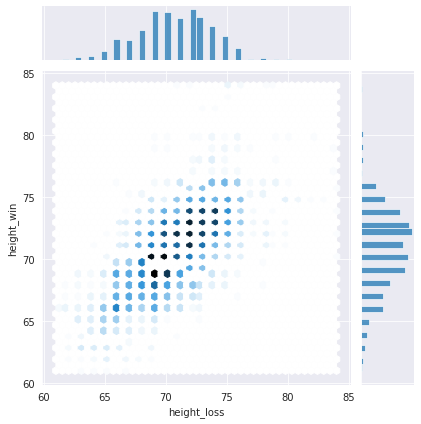

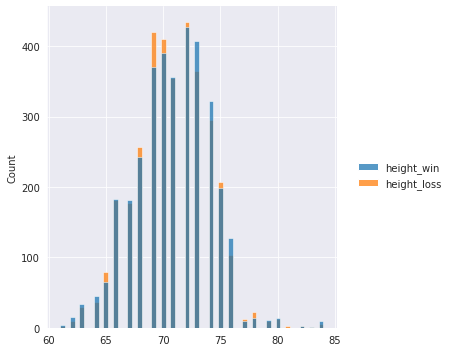

In [6]:
display(sns.jointplot(height_loss,height_win,kind = 'hex'),sns.displot(data = merged_fights[['height_win','height_loss']]))

## Seaborn jointplot and displot. 
## In order to focus on height, must use 
## merged_fights[['height_win','height_loss']]
## to reference specific subset.

Mean height for winners and losers does not differ significantly.
Histogram shows similar story, but with a sizeable spike at 68" in terms of losses with reach disadvantage.

As expected, same min/max for both. Same shortest/tallest fighter just needs to win/lose at least once.

## Height Advantage

In [7]:
height_adv = merged_fights[["height_loss","height_win"]]

height_adv = height_adv.diff(axis = 1).drop('height_loss',axis = 1).rename(columns = {'height_win':'height_advantage'}).dropna(axis = 0)

## Using .diff(axis = 1) to calculate winner's height advantage. 
## Drop null.

display(height_adv,height_adv.describe())

,height_advantage
0,-5.0
1,-3.0
2,-1.0
3,1.0
4,-1.0
...,...
3498,4.0
3499,1.0
3500,2.0
3501,0.0


,height_advantage
count,3433.000000
mean,0.078066
std,2.620025
min,-14.000000
25%,-1.000000
50%,0.000000
75%,2.000000
max,13.000000


alt.Chart(...)

(array([  1.,   0.,   1.,   0.,   2.,   2.,   7.,  20.,  36.,  74., 123.,
        238., 340., 526., 610., 518., 381., 259., 151.,  73.,  39.,  14.,
          6.,   6.,   3.,   1.,   1.,   1.]),
 array([-14.        , -13.03571429, -12.07142857, -11.10714286,
        -10.14285714,  -9.17857143,  -8.21428571,  -7.25      ,
         -6.28571429,  -5.32142857,  -4.35714286,  -3.39285714,
         -2.42857143,  -1.46428571,  -0.5       ,   0.46428571,
          1.42857143,   2.39285714,   3.35714286,   4.32142857,
          5.28571429,   6.25      ,   7.21428571,   8.17857143,
          9.14285714,  10.10714286,  11.07142857,  12.03571429,
         13.        ]),
 <BarContainer object of 28 artists>)

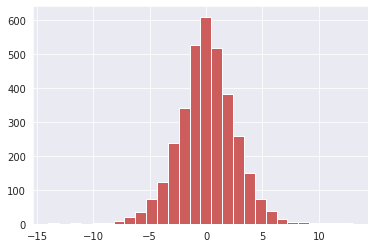

In [9]:
display(plt.hist(height_adv,color = 'indianred',bins = 28))

Mean height advantage (winners') is not that significant. And there is sizeable variation.

## Removing Outliers

In [10]:
no_outliers = height_adv[(np.abs(stats.zscore(height_adv)) < 3).all(axis=1)]

## Computes the z-score for each value.
## Only returns True if z-score is below 3.
## Result of condition used to index DataFrame.
## .all() returns True if all elements of iterable are True.

display(no_outliers,no_outliers.describe())

,height_advantage
0,-5.0
1,-3.0
2,-1.0
3,1.0
4,-1.0
...,...
3498,4.0
3499,1.0
3500,2.0
3501,0.0


,height_advantage
count,3402.000000
mean,0.064668
std,2.473724
min,-7.000000
25%,-1.000000
50%,0.000000
75%,2.000000
max,7.000000


(array([ 20.,  36.,  74., 123., 238., 340., 526., 610., 518., 381., 259.,
        151.,  73.,  39.,  14.]),
 array([-7.        , -6.06666667, -5.13333333, -4.2       , -3.26666667,
        -2.33333333, -1.4       , -0.46666667,  0.46666667,  1.4       ,
         2.33333333,  3.26666667,  4.2       ,  5.13333333,  6.06666667,
         7.        ]),
 <BarContainer object of 15 artists>)

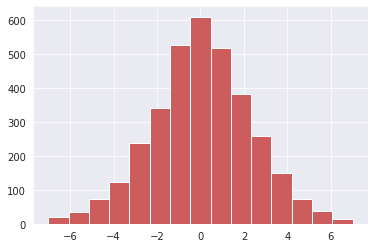

In [11]:
plt.hist(no_outliers,color = 'indianred',bins = 15)

Removing outliers does not have any significant effect on the correlatino between height advantage and winning. In fact, mean height advantage is lower by a tiny amount.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=657be62d-1fc1-4dd5-8bf1-c3b3098a89d0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>